# Задача 1

1.1. Скачать следующие данные: kc-house-data и laptop_price

1.2. Изучите стоимости недвижимости


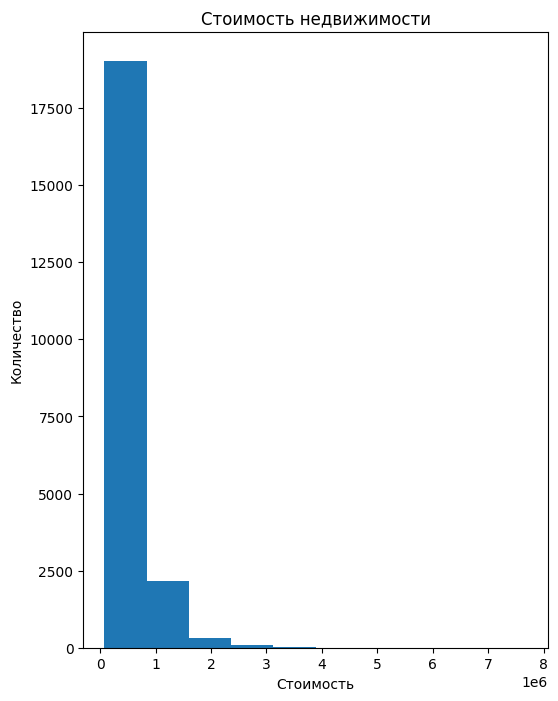

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('kc-house-data.csv', encoding='latin-1', sep=',')

plt.figure(figsize = (6,8))
plt.hist(df['price'], bins = 10)
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.title('Стоимость недвижимости');

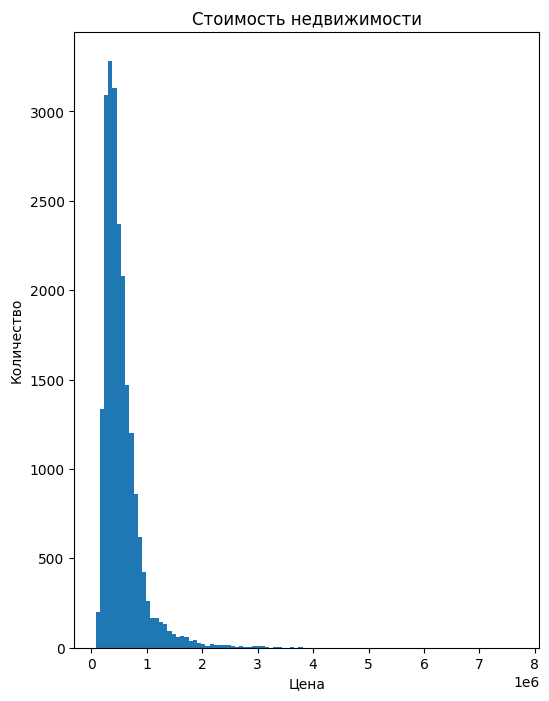

In [16]:
plt.figure(figsize=(6,8))

plt.hist(df['price'], bins=100)
plt.title('Стоимость недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество');

Вывод:

1. Колличество домов прямопропорционально их цене
2. Максимальное количество недвижимости продается по цене до ~700 000-1 000 000 д.е., основная часть недвижимости продается по цене до 2 000 000 д.е.

1.3. Изучите распределение квадратуры жилой

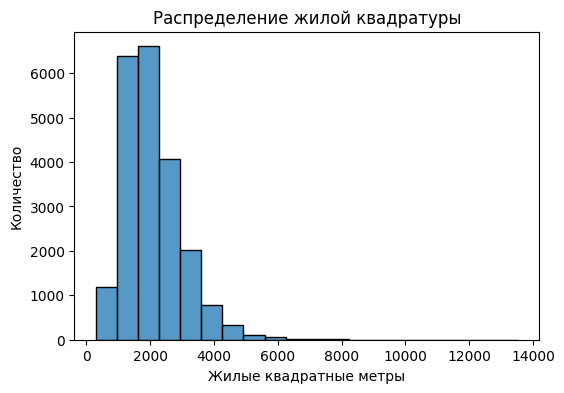

In [8]:
plt.figure(figsize = (6,4))
sns.histplot(df['sqft_living'], bins = 20)
plt.xlabel('Жилые квадратные метры')
plt.ylabel('Количество')
plt.title('Распределение жилой квадратуры');

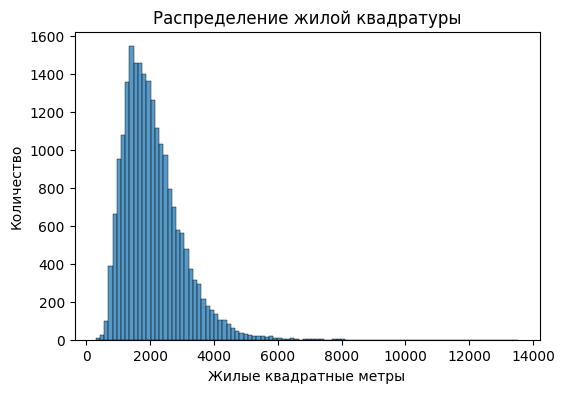

In [18]:
plt.figure(figsize = (6,4))
sns.histplot(df['sqft_living'], bins = 100)
plt.xlabel('Жилые квадратные метры')
plt.ylabel('Количество')
plt.title('Распределение жилой квадратуры');

Вывод:

Максимальное количество недвижимости продается с жилой площадью от ~1700 до 2300 кв.м., основная часть недвижимости продается с жилой площадью от ~500 до 6000 кв.м.

In [19]:
data_yr = df['yr_built'].value_counts(ascending=True)
data_yr.head()

yr_built
1934    21
1935    24
1902    27
1901    29
1933    30
Name: count, dtype: int64

1.4 Изучите распределение года постройки

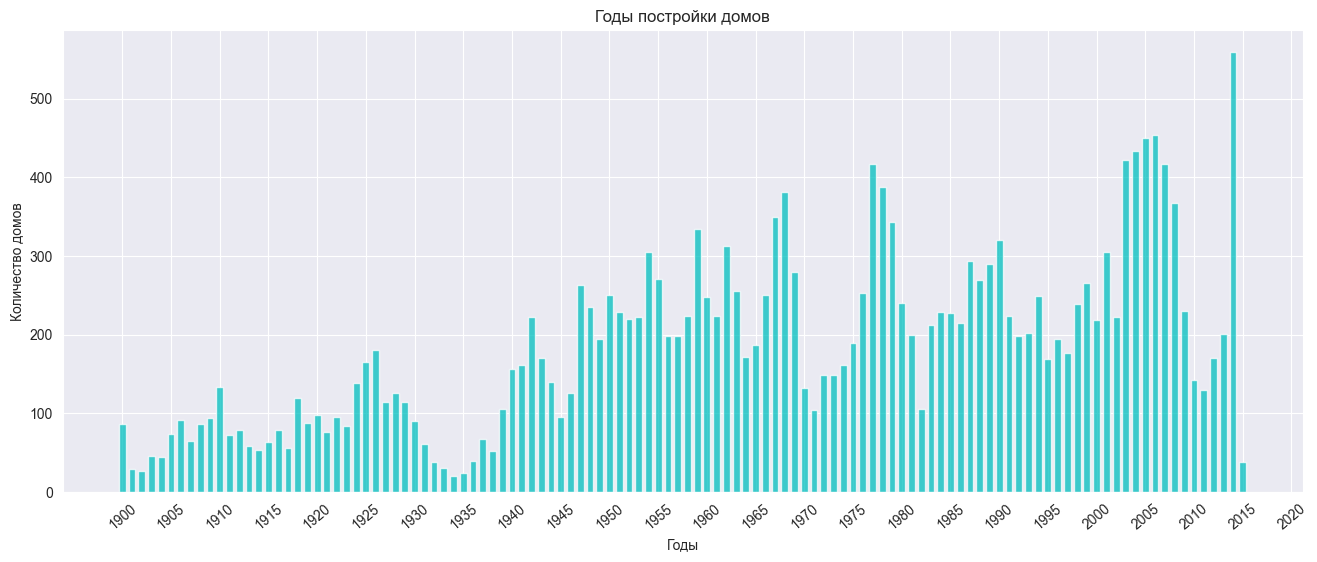

In [31]:
data_yr = df['yr_built'].value_counts(ascending=True)
data_yr.head()

names = data_yr.index
values = data_yr.values
yr_list = list(range(1900,2025,5))
plt.figure(figsize=(16, 6))
plt.bar(names,values, width=0.7, facecolor='c', alpha=0.75)
plt.title('Годы постройки домов')
plt.xlabel('Годы')
plt.ylabel('Количество домов')
plt.grid(True)
plt.xticks(yr_list,rotation=40);
plt.show()
   

Вывод:

Кризисы строительтва были в середине 30-х, начале 70-х, пики в конце 60-х, 70-х и середине нулевых

## 2 задача
2.1. Изучите распределение домов от наличия вида на набережную

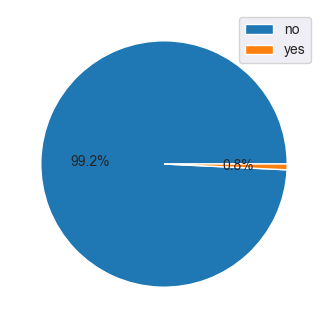

In [21]:
data = df['waterfront'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%')
plt.legend(['no', 'yes']);

Вывод:

Всего лишь 0,8% всей недвижимости продается с видом на набережную

2.2. Изучите распределение этажей домов

In [25]:
df.floors.max(), df.floors.min()

(3.5, 1.0)

In [33]:
data2 = df['floors'].value_counts(normalize=True)*100

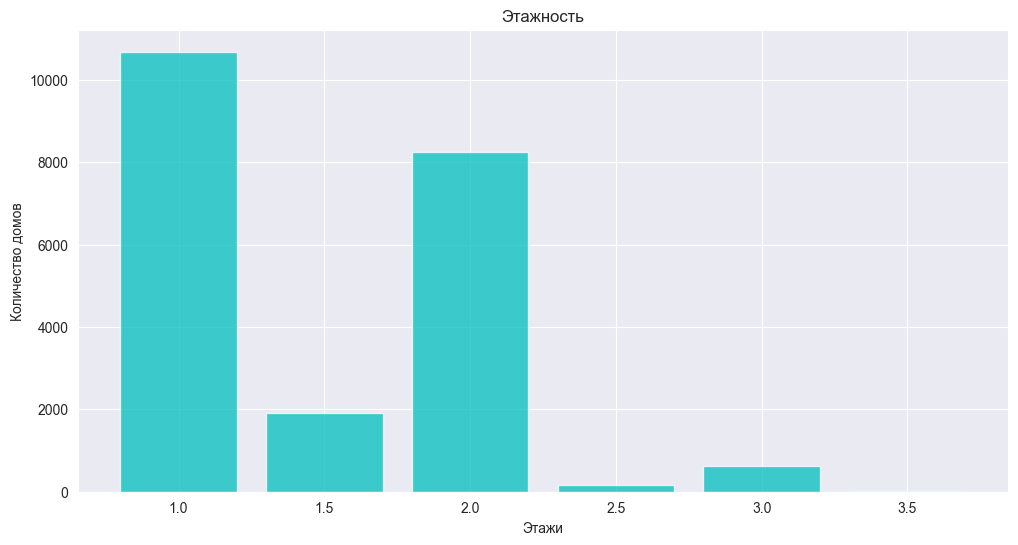

In [32]:
data_floor = df['floors'].value_counts()
f_val = data_floor.values
f_ind = data_floor.index
plt.figure(figsize=(12, 6))
plt.bar(f_ind,f_val, width=0.4, facecolor='c', alpha=0.75)
plt.title('Этажность')
plt.xlabel('Этажи')
plt.ylabel('Количество домов')
plt.grid(True)
plt.show()


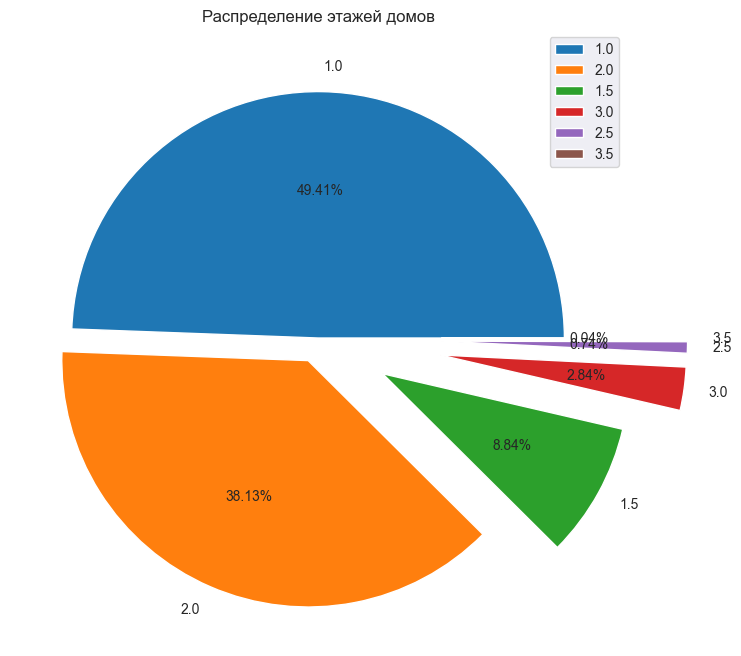

In [34]:
plt.figure(figsize=(10,8))
explode = [0.0, 0.1, 0.3, 0.5, 0.5, 0.5]
plt.pie(data2.values, autopct='%1.2f%%', labels=data2.index, explode=explode)
plt.legend(data2.index)
plt.title('Распределение этажей домов');

Вывод:

1. Большая часть домов состоит из 1 и 2 этажей.
2. Одноэтажные дома лидируют по продаже недвижимости в 49,4%.
3. Минимальная доля продажи приходится на 2,5-этажные и 3,5-этажные дома (0,74%, 0,04%)

2.3. Изучите распределение состояния домов

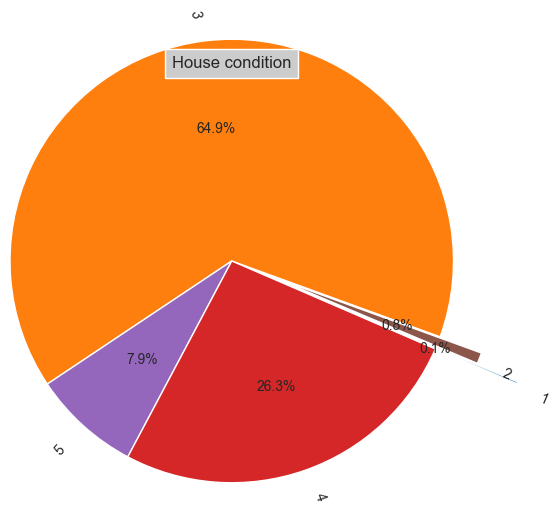

In [29]:
data_cond = df['condition'].value_counts(sort=False)
data_cond
cond_val= data_cond.values
cond_ind = data_cond.index
cond_explode = [0,0,0,0.6,0.3]
colors = ["#ff7f0e", "#9467bd", "#d62728","#1f77b4", "#8c564b"]
plt.title("House condition")
plt.pie(cond_val, labels=cond_ind, radius = 1.5,
        startangle=-20, colors=colors,
        rotatelabels=True, explode = cond_explode,
        labeldistance=1.1, autopct='%.1f%%')
plt.title("House condition", bbox={'facecolor':'0.8', 'pad':5})
plt.show;

Вывод:

Менее 1% домов в плохом состоянии, около 2/3 домов в среднем состоянии

## 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [22]:

corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


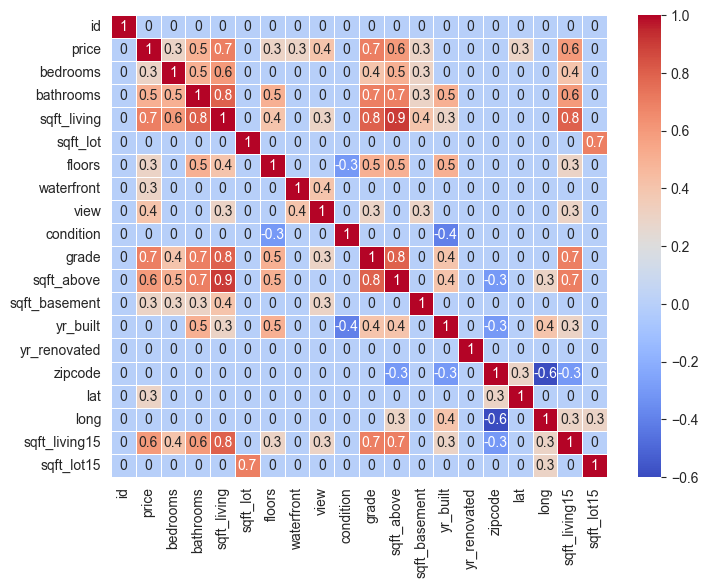

In [23]:

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

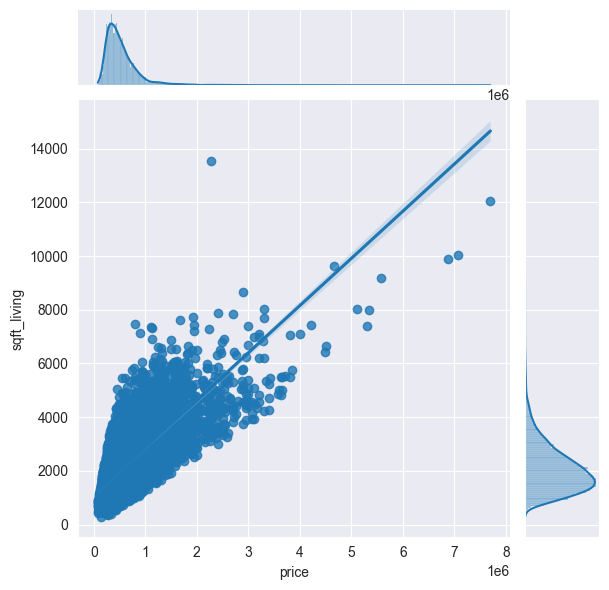

In [24]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

Чем больше жилплощадь дома, тем выше его стоимость

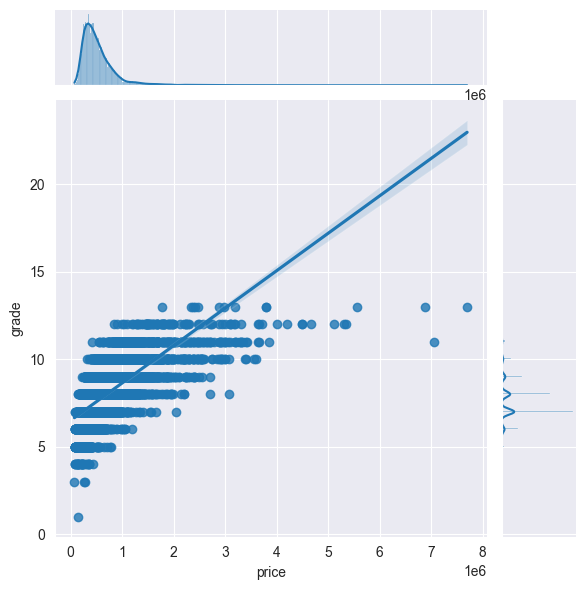

In [25]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg');

Чем выше качество конструкции и дизайна дома, тем выше его стоимость

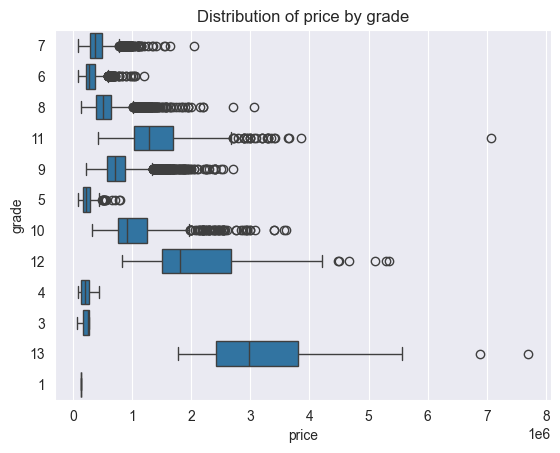

In [26]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Distribution of price by grade');

Наибольшую стоимость имеют дома с оценкой конструкции и дизайна 13

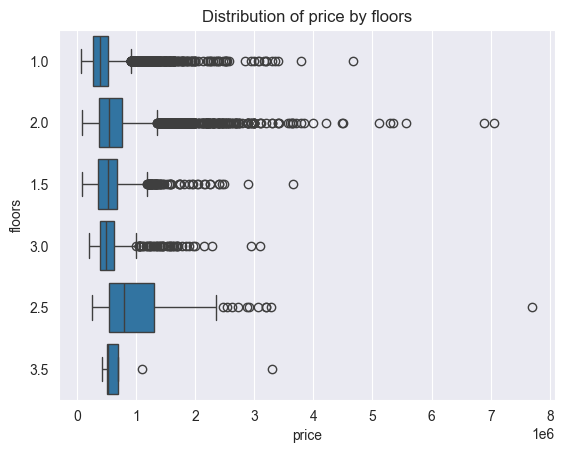

In [27]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('floors')
plt.title('Distribution of price by floors');

Наибольшую стоимость имеют дома с количеством этажей 2,5

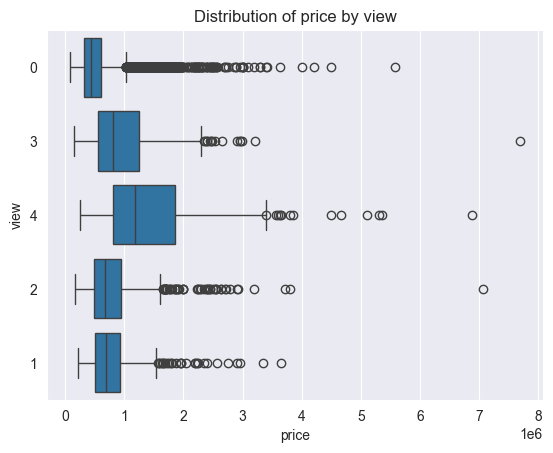

In [28]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('view')
plt.title('Distribution of price by view');

Наибольшую стоимость имеют дома с оценкой вида 4